In [189]:
import pandas as pd
from pathlib import Path
import openpyxl
import matplotlib.pyplot as plt

In [220]:
#Using the path function from the pathlib library to read the excel files
#Loading the operating budget data into dataframes
budget_path_2019 = Path("Resources/approved-operating-budget-summary-2019.xlsx") #2019
budget2019_df = pd.read_excel(budget_path_2019, sheet_name='Open Data')
budget_path_2020 = Path("Resources/approved-operating-budget-summary-2020.xlsx") #2020
budget2020_df = pd.read_excel(budget_path_2020, sheet_name='Open Data')
budget_path_2021 = Path("Resources/approved-operating-budget-summary-2021.xlsx") #2021
budget2021_df = pd.read_excel(budget_path_2021, sheet_name='Open Data')
budget_path_2022 = Path("Resources/approved-operating-budget-summary-2022.xlsx") #2022
budget2022_df = pd.read_excel(budget_path_2022, sheet_name='Open Data')
budget_path_2023 = Path("Resources/approved-operating-budget-summary-2023.xlsx") #2023
budget2023_df = pd.read_excel(budget_path_2023, sheet_name='Open Data')
df_list = [budget2019_df,budget2020_df,budget2021_df,budget2022_df,budget2023_df]

In [140]:
# Changing the names of the excel worksheets to ensure consistency
workbook2019 = openpyxl.load_workbook(budget_path_2019) #opening the 2019 approved budget summary workbook
rename_2019_sheet = workbook2019['2019'] #selecting the excel sheet to rename
rename_2019_sheet.title = 'Open Data' #changing the title 
workbook2019.save(budget_path_2019)  #saving the modified file using the original file path
workbook2019.close()  #closing the workbook
# Only runs once and permanently changes the name

In [46]:
workbook2021 = openpyxl.load_workbook(budget_path_2021) #opening the 2019 approved budget summary workbook
sheet_names = workbook2021.sheetnames # Get the sheet names of the workbook
if '2021' in sheet_names: # if '2021' is in the sheet names
    rename_2021_sheet = workbook2021['2021']  # Selecting the Excel sheet to rename
    rename_2021_sheet.title = 'Open Data'  # Changing the title
    workbook2021.save(budget_path_2021) #Saving the modified excel sheet
workbook2021.close() # Closing the workbook

In [ ]:
#Checking for null values

In [234]:
null_values = budget2019_df.isnull() #Checking for null values
null_per_column_2019 = null_2019.sum() #Summing the number of null values in the columns 
null_2020 = budget2020_df.isnull() 
null_per_column_2020 = null_2020.sum()
null_2021  = budget2021_df.isnull() 
null_per_column_2021 = null_2021.sum()
null_2022 = budget2022_df.isnull()  
null_per_column_2022 = null_2022.sum()
null_2023 = budget2023_df.isnull()    
null_per_column_2023 = null_2023.sum()

In [235]:
print(null_per_column_2019)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64


In [236]:
print(null_per_column_2020)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64


In [230]:
print(null_per_column_2021)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64


In [194]:
print(null_per_column_2022)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64


In [195]:
print(null_per_column_2023)

Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2023                 0
dtype: int64


In [ ]:
#Renaming the last column of each dataset to "Budgeted amount" to ensure consistency and improving the readability 
#of the data

In [242]:
for i in range(len(df_list)): 
    year = 2019 + i    
    df_list[i].rename(columns={year: 'Budgeted amount'}, inplace=True) 

In [ ]:
#Dropping duplicates

In [241]:
for i in range(len(df_list)):
    df_list[i].drop_duplicates(subset='Budgeted amount', inplace=True) #Dropping duplicates in the code to prevent duplication

In [ ]:
#Changing the scientific notation to the power of 6 to keep a standardized format

In [199]:
format_sci_notation = lambda x: '{:.6e}'.format(x)
for df in df_list:
    df['Budgeted amount'] = df['Budgeted amount'].apply(format_sci_notation)

In [ ]:
#Seperating expenses and revenues into separate dataframes

In [200]:
budget2019_df_exp = budget2019_df[budget2019_df['Expense/Revenue']=='Expenses']
budget2020_df_exp = budget2020_df[budget2020_df['Expense/Revenue']=='Expenses']
budget2021_df_exp = budget2021_df[budget2021_df['Expense/Revenue']=='Expenses']
budget2022_df_exp = budget2022_df[budget2022_df['Expense/Revenue']=='Expenses']
budget2023_df_exp = budget2023_df[budget2023_df['Expense/Revenue']=='Expenses']

In [201]:
budget2019_df_rev = budget2019_df[budget2019_df['Expense/Revenue']=='Revenues']
budget2020_df_rev = budget2020_df[budget2020_df['Expense/Revenue']=='Revenues']
budget2021_df_rev = budget2021_df[budget2021_df['Expense/Revenue']=='Revenues']
budget2022_df_rev = budget2022_df[budget2022_df['Expense/Revenue']=='Revenues']
budget2023_df_rev = budget2023_df[budget2023_df['Expense/Revenue']=='Revenues']

In [ ]:
#Calculating the outliers for the expenses dataframe 

In [202]:
df_exp_list = [budget2019_df_exp,budget2020_df_exp, budget2021_df_exp, budget2022_df_exp, budget2023_df_exp] #List containing the names of the dataframes storing expense data
all_outliers_exp = pd.DataFrame() #Creating an empty dataframe to store the outliers

for df in df_exp_list:
    df.loc[:,'Budgeted amount'] = pd.to_numeric(df['Budgeted amount'], errors='coerce') #Changing data to numeric for calculations
    lower_quartiles_exp = df.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25)) #Calculating the lower quantile
    upper_quartiles_exp = df.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75)) #Calculating the upper quantile
    iqr_exp = upper_quartiles_exp - lower_quartiles_exp #Calculating the interquantile range
    lower_bound_exp = lower_quartiles_exp - 1.5 * iqr_exp #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
    upper_bound_exp = upper_quartiles_exp + 1.5 * iqr_exp  #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
    outliers_exp = df[(df['Budgeted amount'] < lower_bound_exp) | (df['Budgeted amount'] > upper_bound_exp)] #Identifing and filtering outliers in the 'Budgeted amount' column based on the calculated lower and upper bounds for expenses.
    all_outliers_exp = pd.concat([all_outliers_exp, outliers_exp], ignore_index=True) #Combining identified outliers from each dataframe and create a final dataframe

# Display the result
all_outliers_exp

/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_26335/2573131695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Budgeted amount'] = pd.to_numeric(df['Budgeted amount'], errors='coerce') #Changing data to numeric for calculations
/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_26335/2573131695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Budgeted amount'] = pd.to_numeric(df['Budgeted amount'], errors='coerce') #Changing data to numeric for calculations
/v

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
0,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,796278.3
1,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-Legal Services,228298.7
2,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,796144.5
3,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-Legal Services,228299.7
4,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,1185215.0
...,...,...,...,...,...,...,...,...
10975,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Contracted Services,Contracted Services - Security Guard,610000.0
10976,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Materials & Supplies,Energy,Hydro,84000.0
10977,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Materials & Supplies,Supplies,Miscellaneous Materials & Supplies,216250.0
10978,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Expenses,714500.0


In [203]:
df_rev_list = [budget2019_df_rev, budget2020_df_rev,budget2021_df_rev,budget2022_df_rev,budget2023_df_rev]
all_outliers_rev = pd.DataFrame()

for dataf in df_rev_list:
    dataf.loc[:,'Budgeted amount'] = pd.to_numeric(dataf['Budgeted amount'], errors='coerce')
    lower_quartiles_rev = dataf.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25))
    upper_quartiles_rev = dataf.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75))
    iqr_rev = upper_quartiles_rev - lower_quartiles_rev
    lower_bound_rev = lower_quartiles_rev - 1.5 * iqr_rev
    upper_bound_rev = upper_quartiles_rev + 1.5 * iqr_rev
    outliers_rev = dataf[(dataf['Budgeted amount'] < lower_bound_rev) | (dataf['Budgeted amount'] > upper_bound_rev)]
    all_outliers_rev = pd.concat([all_outliers_rev, outliers_rev], ignore_index=True)

# Display the result
all_outliers_rev[all_outliers_rev['Budgeted amount']<0]

/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_26335/2706302284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,'Budgeted amount'] = pd.to_numeric(dataf['Budgeted amount'], errors='coerce')
/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_26335/2706302284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,'Budgeted amount'] = pd.to_numeric(dataf['Budgeted amount'], errors='coerce')
/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_26335/2706302284.

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
0,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Reserves,-7000000.0
1,Children's Services,Child Care Delivery,Child Care Delivery,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-338727700.0
2,Children's Services,Child Care Delivery,Child Care Delivery,Revenues,User Fees & Donations,User Fees,"Fees, Svc Charges",-38191100.0
3,Children's Services,Child Care Delivery,Child Care Delivery,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Social Ser,-10200000.0
4,Children's Services,Child Care System Management,Child Care System Management,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-146495000.0
...,...,...,...,...,...,...,...,...
939,Transportation Services,Road & Sidewalk Management,Public Realm Improvements & Programs,Revenues,Other Revenue,Miscellaneous Revenues,Contrib - Other,-33833430.0
940,Transportation Services,Road & Sidewalk Management,Public Realm Improvements & Programs,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserve Funds,-35459660.0
941,Transportation Services,Road & Sidewalk Management,Road & Sidewalk Repairs & Cleaning,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserve Funds,-6501001.0
942,Transportation Services,Road & Sidewalk Management,Road & Sidewalk Repairs & Cleaning,Revenues,Other Revenue,Miscellaneous Revenues,Utility Cut Repair Recoveries,-4335078.0


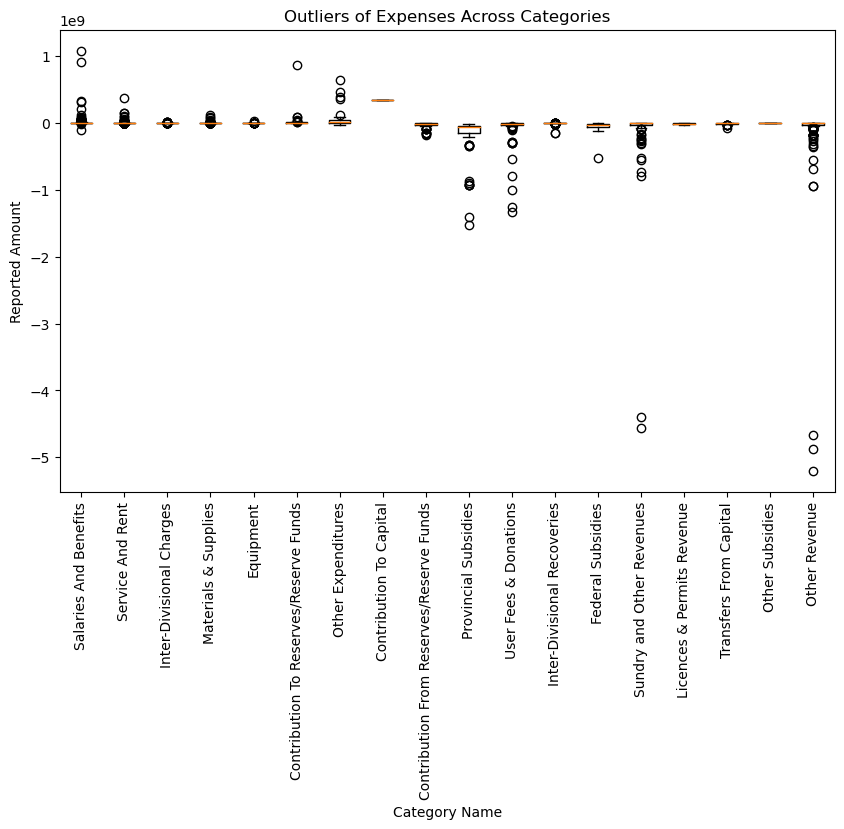

In [204]:
plt.figure(figsize=(10, 6))  #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers[all_outliers['Category Name'] == category]['Budgeted amount'] for category in all_outliers['Category Name'].unique()])
plt.title('Outliers of Expenses Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers['Category Name'].unique()) + 1), all_outliers['Category Name'].unique(), rotation=90)
plt.show()

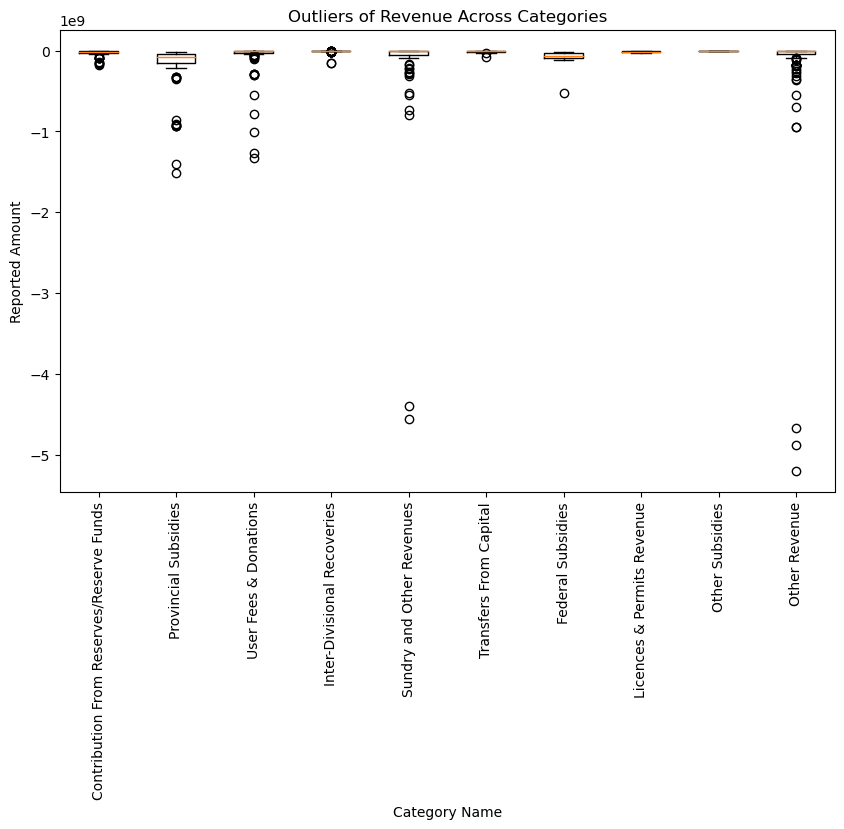

In [205]:
plt.figure(figsize=(10, 6)) #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_rev[all_outliers_rev['Category Name'] == category_rev]['Budgeted amount'] for category_rev in all_outliers_rev['Category Name'].unique()])
plt.title('Outliers of Revenue Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_rev['Category Name'].unique()) + 1), all_outliers_rev['Category Name'].unique(), rotation=90)
plt.show()

In [207]:
combined_exp_df = pd.concat(df_exp_list, ignore_index = True)

In [219]:
combined_exp_df['Program'].unique()

array(['Affordable Housing Office', "Children's Services",
       'Court Services', 'Economic Development & Culture',
       'Long-Term Care Homes & Services', 'Parks, Forestry & Recreation',
       'Shelter, Support & Housing Administration',
       'Social Development, Finance & Administration',
       'Toronto Employment & Social Services',
       'Toronto Paramedic Services', 'City Planning',
       'Engineering & Construction Services', 'Fire Services',
       'Municipal Licensing & Standards',
       'Policy, Planning, Finance & Administration', 'Toronto Building',
       'Transportation Services', '311 Toronto',
       'Facilities, Real Estate, Environment & Energy', 'Fleet Services',
       'Information & Technology',
       'Office of the Chief Financial Officer',
       'Office of the Controller', "City Manager's Office",
       "City Clerk's Office", 'City Council', 'Legal Services',
       "Mayor's Office", "Auditor General's Office",
       "Integrity Commissioner's Office

In [245]:
budget_sum_by_program = combined_exp_df.groupby('Program')['Budgeted amount'].sum()
df_budget = pd.DataFrame(budget_sum_by_program)
df_budget.sort_values('Budgeted amount', ascending=False)

,Budgeted amount
Program,
Toronto Transit Commission - Conventional,1.026424e+10
Toronto Police Service,6.207482e+09
Toronto Employment & Social Services,5.707142e+09
Capital & Corporate Financing,5.426121e+09
Toronto Water,5.008522e+09
...,...
Office of the Ombudsman,1.256259e+07
Affordable Housing Office,1.104880e+07
Office of the Lobbyist Registrar,6.162638e+06
